In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv("student_habits_performance.csv")

In [3]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info

<bound method DataFrame.info of     student_id  age  gender  study_hours_per_day  social_media_hours  \
0        S1000   23  Female                  0.0                 1.2   
1        S1001   20  Female                  6.9                 2.8   
2        S1002   21    Male                  1.4                 3.1   
3        S1003   23  Female                  1.0                 3.9   
4        S1004   19  Female                  5.0                 4.4   
..         ...  ...     ...                  ...                 ...   
995      S1995   21  Female                  2.6                 0.5   
996      S1996   17  Female                  2.9                 1.0   
997      S1997   20    Male                  3.0                 2.6   
998      S1998   24    Male                  5.4                 4.1   
999      S1999   19  Female                  4.3                 2.9   

     netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0              1.1            N

In [5]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df.describe()

# no outliers

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [9]:
df.describe(include="object")

# for the most no. of students:
# they are males.
# they dont do any part time job.
# diet quality is fair.
# parental education level is high school.
# internet quality is good.
# they dont participate in extracurricular activities.

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [10]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

In [11]:
for col in categorical_cols:
    print(df[col].value_counts())

gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
part_time_job
No     713
Yes    196
Name: count, dtype: int64
diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


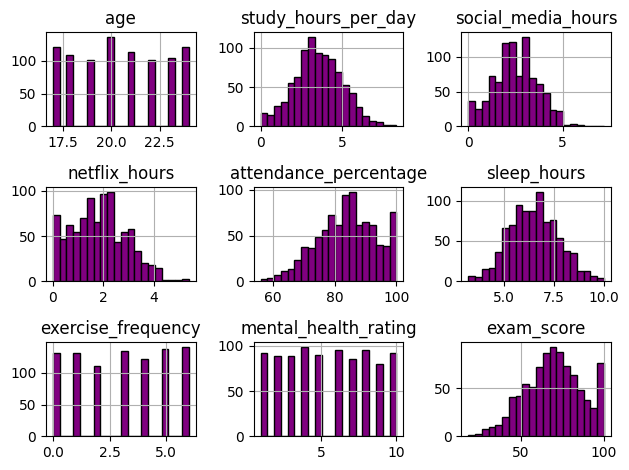

In [12]:
df.hist(bins = 20, edgecolor = 'black', color = 'purple')
plt.tight_layout()
plt.show()

# the dataset contains maximum students of around 20 yrs.
# most of them study less than 5 hrs.
# most of them have social media hrs below 5hrs.
# most of them have netflix hours about 2hrs.
# most of them have attendance above 80%
# most of them have sleep hrs below 7.5 hrs. (between 5 hrs and 7.5hrs)
# exam score around 70-75 is most common. score=100 is also having a high freq !

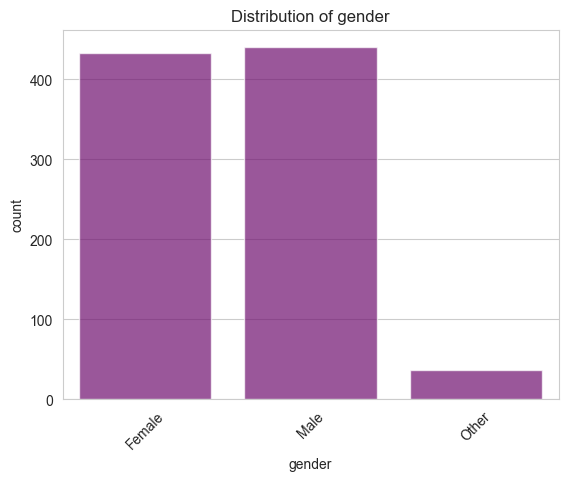

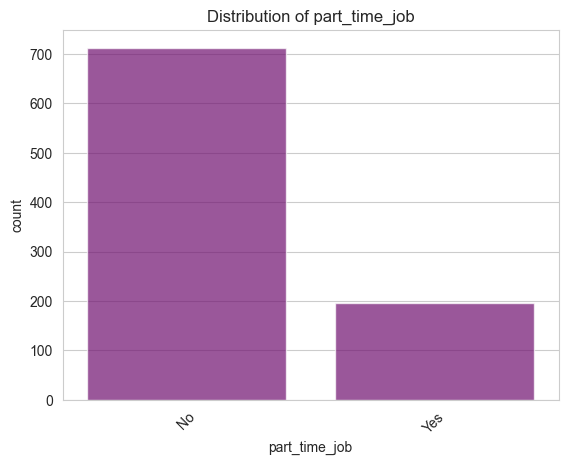

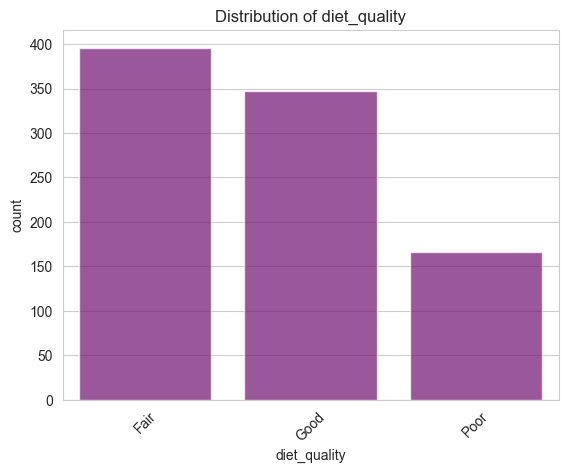

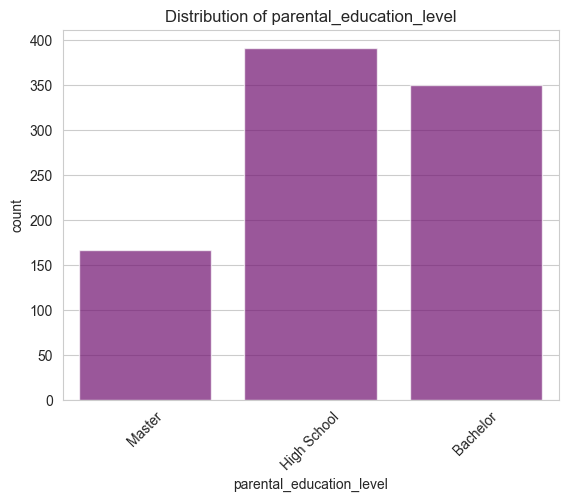

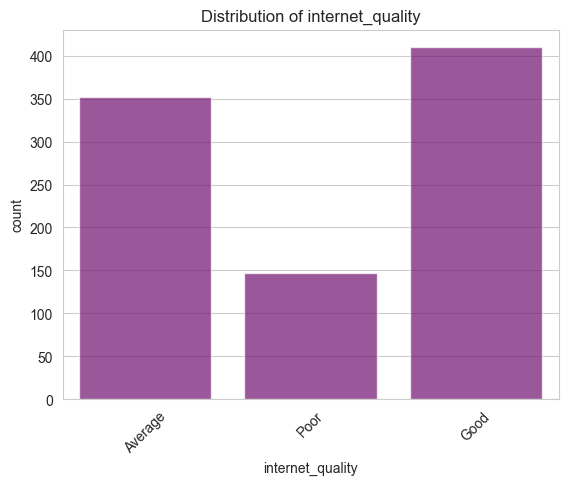

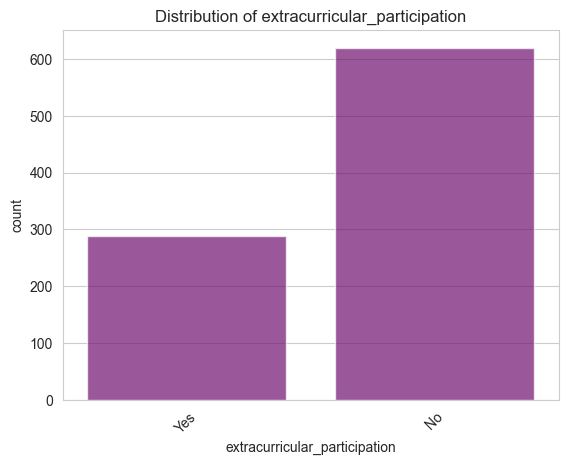

In [13]:
for col in categorical_cols:
    sns.set_style("whitegrid")
    sns.countplot(data = df, x = col, color = 'purple', alpha = 0.7)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation = 45)
    plt.show()

Text(0.5, 1.0, 'Correlation matrix')

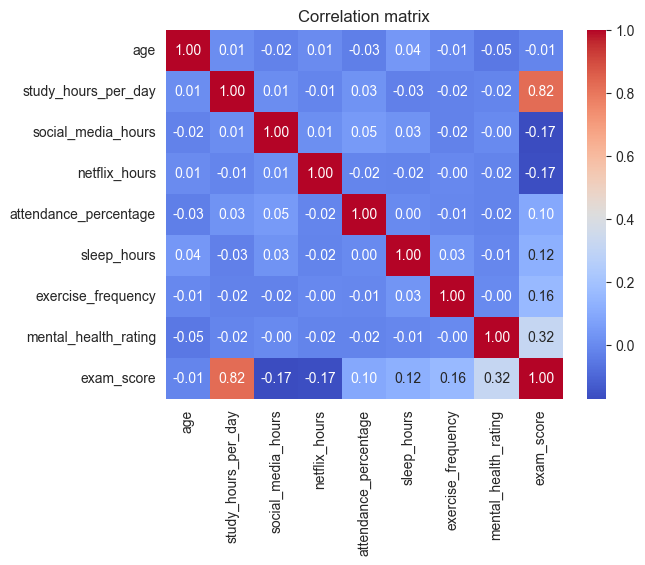

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation matrix")

here we see only corr with exam score, coz we exam score is the target variable.
study hrs per day is highly correlated with exam score and it is a positive correlation.

In [15]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [16]:
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

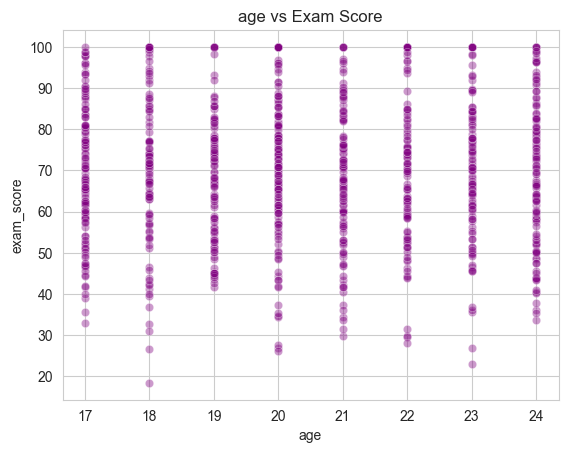

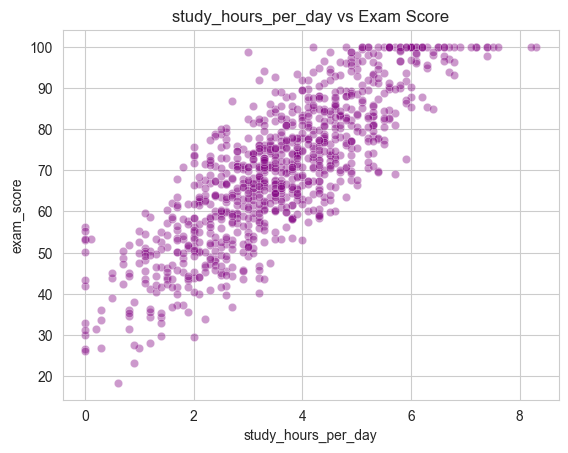

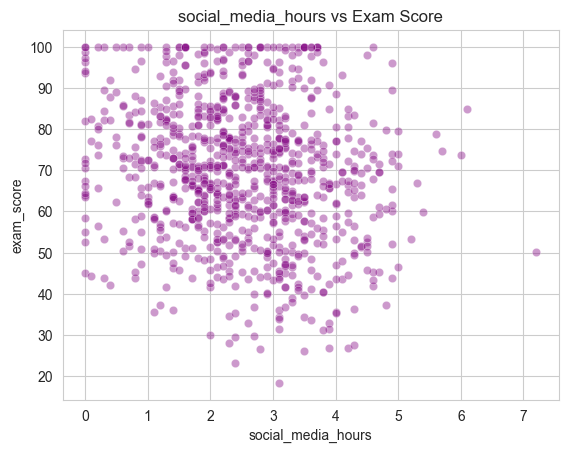

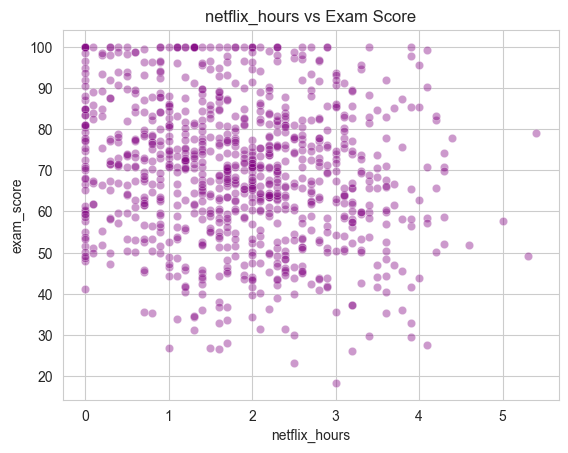

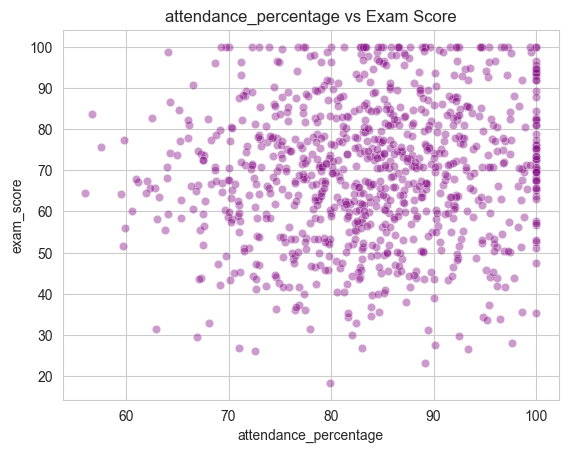

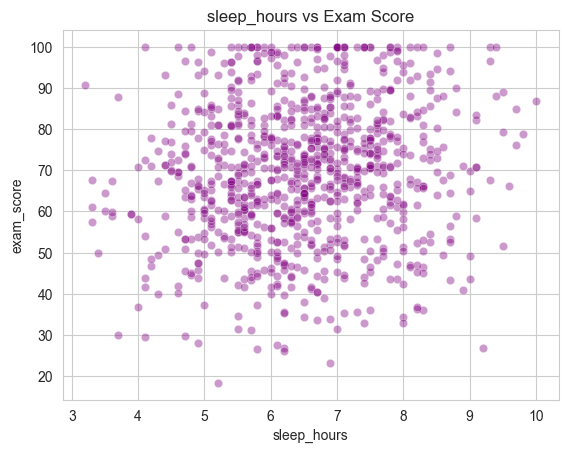

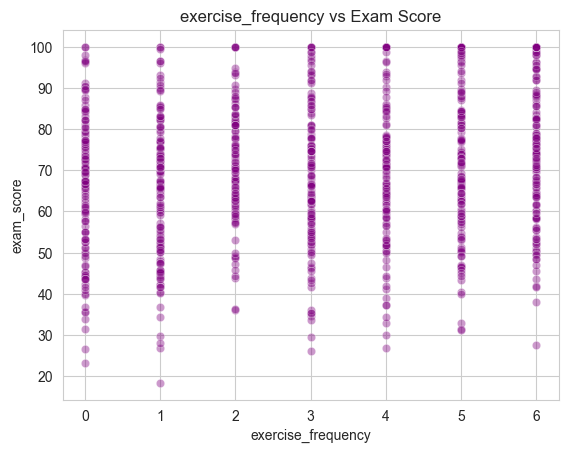

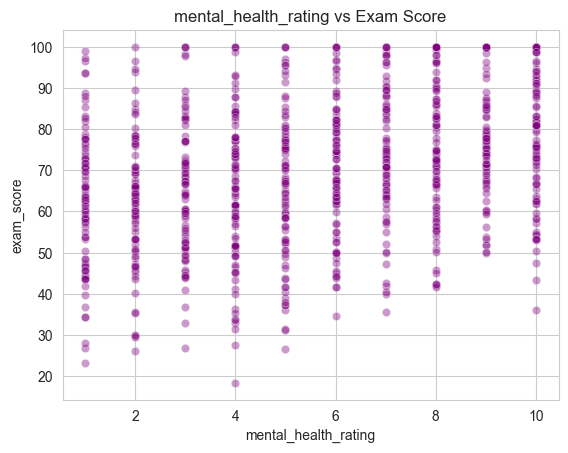

In [17]:
for coln in numerical_cols:
    sns.scatterplot(data = df, x = coln, y='exam_score', color = 'purple', alpha = 0.4)
    plt.title(f"{coln} vs Exam Score")
    plt.show()

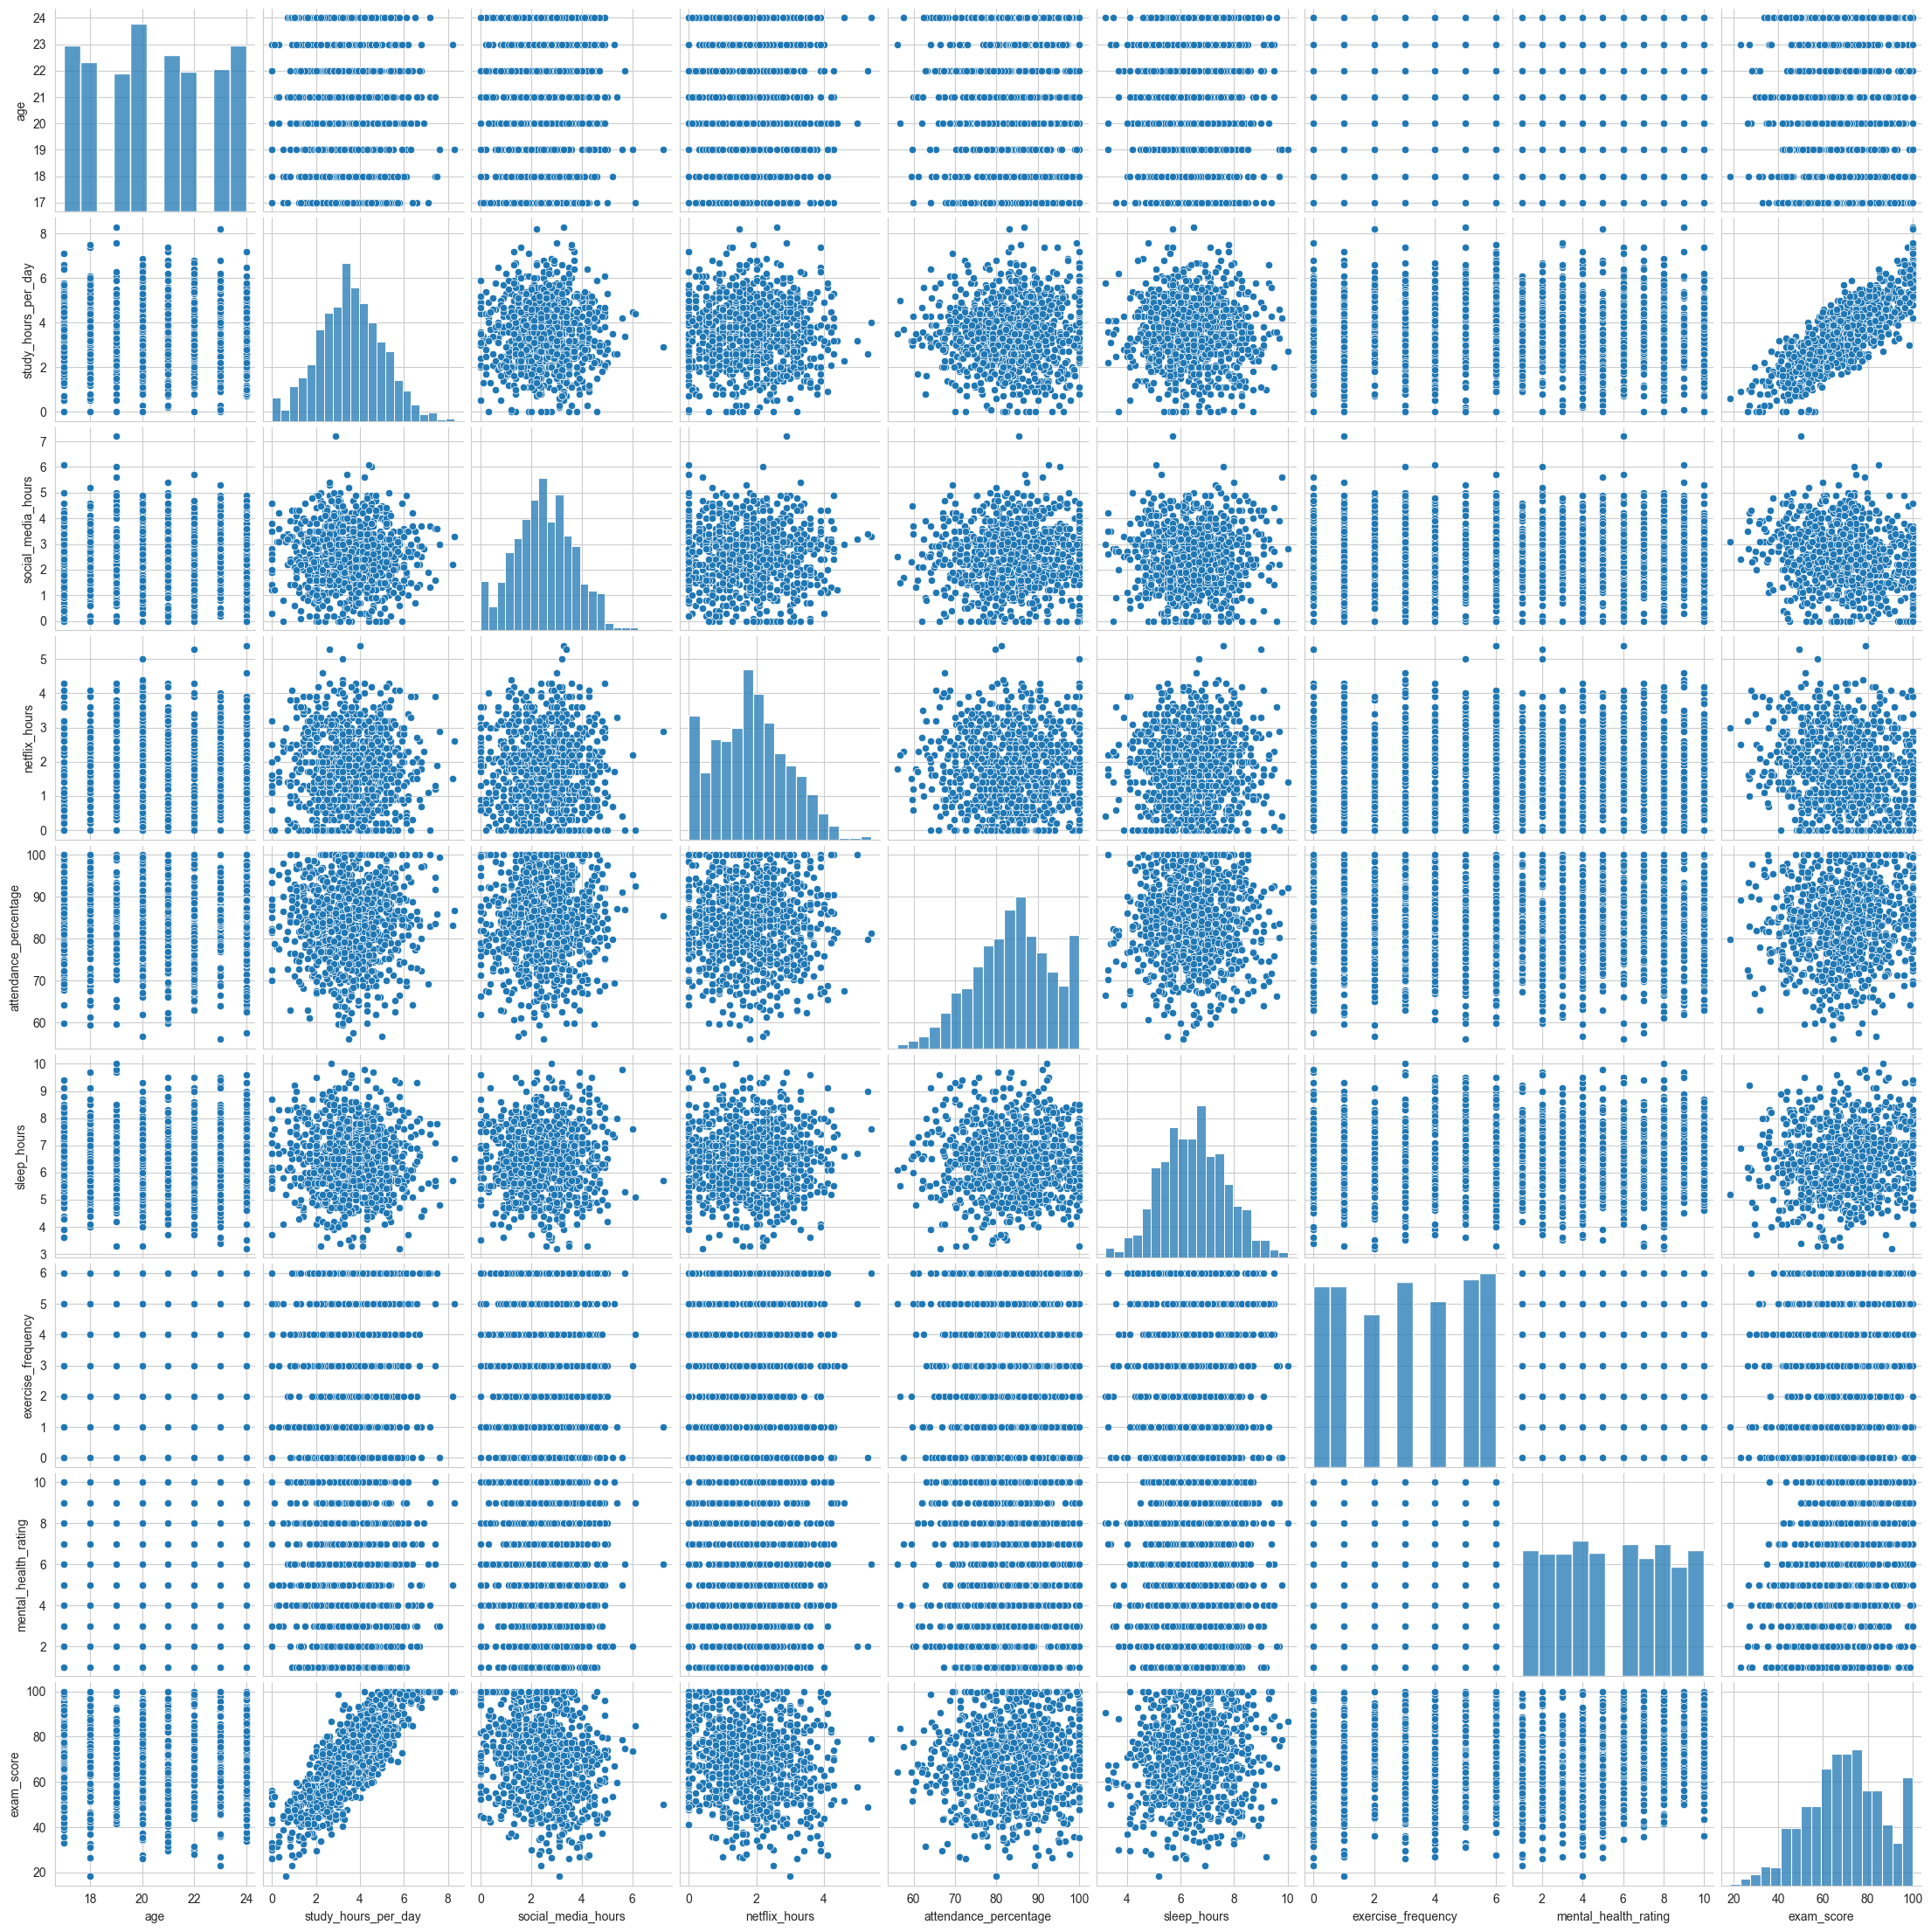

In [18]:
sns.pairplot(data = df)

feature engineering

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
gender_enc = LabelEncoder()
parental_edu_enc = LabelEncoder()
internet_enc = LabelEncoder()
extracurr_enc = LabelEncoder()
part_time_enc = LabelEncoder()

In [24]:
df['gender_encode'] = gender_enc.fit_transform(df['gender'])
df['parental_education_level_encode'] = parental_edu_enc.fit_transform(df['parental_education_level'])
df['internet_quality_encode'] = internet_enc.fit_transform(df['internet_quality'])
df['extracurr_enc'] = extracurr_enc.fit_transform(df['extracurricular_participation'])
df['part_time_enc'] = part_time_enc.fit_transform(df['part_time_job'])

In [25]:
df

# female=0, male=1
# internet quality: average = 0, poor = 2, good = 1
# parental edu level: master = 2, high school = 1, bachelor = 0
# part time job no 0, yes 1.
# extra curr yes 1, no 0

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_encode,parental_education_level_encode,internet_quality_encode,extracurr_enc,part_time_enc
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Master,Average,8,Yes,56.2,0,2,0,1,0
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,High School,Average,8,No,100.0,0,1,0,0,0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,High School,Poor,1,No,34.3,1,1,2,0,0
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Master,Good,1,Yes,26.8,0,2,1,1,0
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Master,Good,1,No,66.4,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,High School,Good,6,Yes,76.1,0,1,1,1,0
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,High School,Average,6,Yes,65.9,0,1,0,1,1
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Bachelor,Good,9,Yes,64.4,1,0,1,1,0
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Bachelor,Average,1,No,69.7,1,0,0,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
age_scaler = StandardScaler()
study_hr_scaler = StandardScaler()
social_media_scaler = StandardScaler()
netflix_scaler = StandardScaler()
attendace_scaler = StandardScaler()
sleep_scaler = StandardScaler()
excercise_scaler = StandardScaler()
mental_health_scaler = StandardScaler()

In [56]:
df['age_scaled'] = age_scaler.fit_transform(df[['age']])
df['study_hr_scaled'] = study_hr_scaler.fit_transform(df[['study_hours_per_day']])
df['social_media_scaled'] = social_media_scaler.fit_transform(df[['social_media_hours']])
df['netflix_scaled'] = netflix_scaler.fit_transform(df[['netflix_hours']])
df['attendace_scaled'] = attendace_scaler.fit_transform(df[['attendance_percentage']])
df['sleep_scaled'] = sleep_scaler.fit_transform(df[['sleep_hours']])
df['excercise_scaled'] = excercise_scaler.fit_transform(df[['exercise_frequency']])
df['mental_health_scaled'] = mental_health_scaler.fit_transform(df[['mental_health_rating']])

In [57]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,extracurr_enc,part_time_enc,age_scaled,study_hr_scaled,netflix_scaled,attendace_scaled,sleep_scaled,excercise_scaled,mental_health_scaled,social_media_scaled
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,1,0,1.097025,-2.409063,-0.682160,0.118506,1.252562,1.449141,0.887113,-1.120653
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,0,0,-0.206499,2.288261,0.438642,1.420311,-1.538274,1.449141,0.887113,0.253727
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,0,0,0.228009,-1.455982,-0.495360,1.155716,1.252562,-1.008451,-1.563908,0.511424
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,0,1.097025,-1.728291,-0.775560,-1.363223,2.237564,0.466104,-1.563908,1.198614
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,0,0,-0.641007,0.994795,-1.242561,0.742949,-1.292024,-0.025414,-1.563908,1.628108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,1,0,0.228009,-0.639057,-0.215159,-0.728197,0.842145,-0.516932,0.186822,-1.721945
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,1,1,-1.510022,-0.434825,0.532042,0.224344,0.267561,-1.008451,0.186822,-1.292451
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,1,0,-0.206499,-0.366748,-0.495360,-2.326347,0.021311,0.957622,1.237259,0.081930
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,0,1,1.531533,1.267104,-0.682160,1.706073,0.924229,-1.499969,-1.563908,1.370412


In [58]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'gender_encode', 'parental_education_level_encode',
       'internet_quality_encode', 'extracurr_enc', 'part_time_enc',
       'age_scaled', 'study_hr_scaled', 'netflix_scaled', 'attendace_scaled',
       'sleep_scaled', 'excercise_scaled', 'mental_health_scaled',
       'social_media_scaled'],
      dtype='object')

In [60]:
# independent and dependent variables
X = df[['gender_encode', 'parental_education_level_encode','internet_quality_encode', 'extracurr_enc', 'part_time_enc','age_scaled', 'study_hr_scaled', 'netflix_scaled', 'attendace_scaled',
       'sleep_scaled', 'excercise_scaled', 'mental_health_scaled',
       'social_media_scaled']]
y = df['exam_score']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr = LinearRegression()

In [65]:
# train the model
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


predictions

In [66]:
y_pred = lr.predict(X_test)
y_pred

array([ 62.02338556,  51.45350016,  70.9555949 ,  71.01778853,
        87.22026047,  63.87355041,  78.49948368,  94.15284013,
        66.33521007,  68.01314996,  56.74363253,  76.79964396,
        57.46016233,  49.46912672,  77.50524118,  76.59510551,
        48.92799076,  89.97338392,  84.39976263,  65.12857775,
        74.47793951,  98.30008606,  54.46518349,  67.97933179,
        82.08318915,  64.20604554, 104.8805936 ,  77.08472867,
        60.7697604 , 103.25664601,  60.68972142,  81.57815313,
        54.28433748,  64.42232213,  61.69691837,  64.74176217,
        98.15259759,  56.44321393,  60.46936031,  74.51528186,
        60.56079245,  84.21182656,  69.33207962,  69.73435959,
        88.66755001,  71.91737521,  48.30408288, 100.23999637,
        79.69178604,  79.44461893,  63.72181183,  47.59359821,
        65.12022898,  73.56180532,  69.41227062, 103.45781215,
        69.1863184 ,  58.98663455,  80.73990679,  58.32947157,
        74.22604304,  70.79034707,  50.31785199,  83.14

In [67]:
dff = pd.DataFrame({
    'y_actual': y_test,
    'y_predicted': y_pred
})
dff['error'] = dff['y_actual']-dff['y_predicted']
dff['absolute_error'] = abs(dff['error'])
mean_abs_err = dff['absolute_error'].mean()
mean_abs_err

np.float64(4.249925457508292)

In [68]:
dff

,y_actual,y_predicted,error,absolute_error
956,59.6,62.023386,-2.423386,2.423386
479,43.3,51.453500,-8.153500,8.153500
372,68.4,70.955595,-2.555595,2.555595
814,75.1,71.017789,4.082211,4.082211
866,87.9,87.220260,0.679740,0.679740
...,...,...,...,...
639,62.9,63.183072,-0.283072,0.283072
959,45.7,53.509811,-7.809811,7.809811
488,93.4,84.613681,8.786319,8.786319
867,94.5,91.417318,3.082682,3.082682


model evaluation

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
r2score = r2_score(y_test, y_pred) 

In [ ]:
print(f"Variance in exam score: {round(r2score, 4)*100}")

# The model’s predictive power is good.

Variance in exam score: 88.83


In [ ]:
print(f"Mean absolute error: {round(mean_absolute_error(y_test, y_pred), 2)}")
# On average, exam score predictions are off by 4.25 marks
# Predictions are quite accurate for individual students.

Mean absolute error: 4.25


In [73]:
mse = mean_squared_error(y_test, y_pred)

In [74]:
print(f"Mean squared error: {round(mse, 2)}")

Mean squared error: 30.31


In [75]:
print("Root mean squared error (RMSE):", mse**0.5)

Root mean squared error (RMSE): 5.50582594510027


In [76]:
lr.coef_

array([-0.08465464, -0.12204744, -0.20187069, -0.37719029,  0.39847536,
       -0.13571284, 14.11413002, -2.29921585,  1.61866788,  2.47799627,
        3.10152482,  5.65337356, -3.08772887])

In [77]:
c_df = pd.DataFrame(lr.coef_, X.columns, columns = ['coef'])
c_df

,coef
gender_encode,-0.084655
parental_education_level_encode,-0.122047
internet_quality_encode,-0.201871
extracurr_enc,-0.377190
part_time_enc,0.398475
age_scaled,-0.135713
study_hr_scaled,14.114130
netflix_scaled,-2.299216
attendace_scaled,1.618668
sleep_scaled,2.477996


In [78]:
lr.intercept_

np.float64(69.91437477782733)

customise predictions

In [80]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'gender_encode', 'parental_education_level_encode',
       'internet_quality_encode', 'extracurr_enc', 'part_time_enc',
       'age_scaled', 'study_hr_scaled', 'netflix_scaled', 'attendace_scaled',
       'sleep_scaled', 'excercise_scaled', 'mental_health_scaled',
       'social_media_scaled'],
      dtype='object')

In [81]:
gender = 'Female'
parental_education_level = 'Master'
internet_quality = 'Good'
extracurricular_participation = 'No'
part_time_job = 'Yes'
age = 20
study_hours_per_day = 5.0
netflix_hours = 0.0
attendance_percentage = 90.0
sleep_hours = 7.0
excercise_hours = 1.0
mental_health_rating = 9.5
social_media_hours = 1.0

In [84]:
gender_val = gender_enc.transform([gender])[0]
parental_edu_val = parental_edu_enc.transform([parental_education_level])[0]
internet_val = internet_enc.transform([internet_quality])[0]
extracurr_val = extracurr_enc.transform([extracurricular_participation])[0]
part_time_val = part_time_enc.transform([part_time_job])[0]


In [85]:
age_scaled = age_scaler.transform([[age]])[0][0]
study_hr_scaled = study_hr_scaler.transform([[study_hours_per_day]])[0][0]
netflix_scaled = netflix_scaler.transform([[netflix_hours]])[0][0]
attendance_scaled = attendace_scaler.transform([[attendance_percentage]])[0][0]
sleep_scaled = sleep_scaler.transform([[sleep_hours]])[0][0]
excercise_scaled = excercise_scaler.transform([[excercise_hours]])[0][0]
mental_health_scaled = mental_health_scaler.transform([[mental_health_rating]])[0][0]
social_media_scaled = social_media_scaler.transform([[social_media_hours]])[0][0]

In [86]:
custom_input = [[
    gender_val,
    parental_edu_val,
    internet_val,
    extracurr_val,
    part_time_val,
    age_scaled,
    study_hr_scaled,
    netflix_scaled,
    attendance_scaled,
    sleep_scaled,
    excercise_scaled,
    mental_health_scaled,
    social_media_scaled
]]


In [ ]:
predicted_score = lr.predict(custom_input)
print("Predicted Exam Score:", round(predicted_score[0], 2))

# the predicted exam score is 98.83

Predicted Exam Score: 98.83


In [ ]:
# connecting streamlit with the model
# freezing the trained model

import pickle

with open("student_model.pkl", "wb") as f:
    pickle.dump({
        "model": lr,
        "gender_enc": gender_enc,
        "parental_edu_enc": parental_edu_enc,
        "internet_enc": internet_enc,
        "extracurr_enc": extracurr_enc,
        "part_time_enc": part_time_enc,
        "age_scaler": age_scaler,
        "study_hr_scaler": study_hr_scaler,
        "netflix_scaler": netflix_scaler,
        "attendace_scaler": attendace_scaler,
        "sleep_scaler": sleep_scaler,
        "excercise_scaler": excercise_scaler,
        "mental_health_scaler": mental_health_scaler,
        "social_media_scaler": social_media_scaler
    }, f)
